In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_df = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/train.csv')

test_df = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/test.csv')

In [3]:
train_df.head(n = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(train_df['Age'].mean())
print(train_df['Embarked'].mode())
print(train_df['Age'].median())

29.69911764705882
0    S
dtype: object
28.0


In [7]:
train_df['Embarked'].mode()[0]

'S'

In [8]:
train_df.mode().sum()

C:\Users\bhatt\AppData\Local\Temp\ipykernel_32796\92701982.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.mode().sum()


PassengerId                                               397386
Survived                                                     0.0
Pclass                                                       3.0
Name           Abbing, Mr. AnthonyAbbott, Mr. Rossmore Edward...
Age                                                         24.0
SibSp                                                        0.0
Parch                                                        0.0
Fare                                                        8.05
dtype: object

In [9]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [10]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
train_df.drop('Cabin', axis = 1, inplace=True)

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
train_df.drop('Ticket', axis = 1, inplace=True)
train_df.drop('Name', axis = 1, inplace=True)
train_df.drop('PassengerId', axis = 1, inplace=True)

In [14]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
train_X = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])

In [16]:
train_df['Sex'] = np.where(train_df['Sex'] == 'male', 0, 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [18]:
train_Y = train_X['Survived']
train_X.drop('Survived', axis = 1, inplace=True)

In [19]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [20]:
train_Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [22]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [23]:
def cost(X, Y, theta):
    hx = hypothesis(X, theta)
    loss = np.mean(Y*np.log(hx) + (1-Y)*np.log(1-hx))
    return -1*loss

In [24]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    grad = np.dot(X.T, (Y - y_p))
    return grad/X.shape[0]

In [25]:
def gradient_descent(X, Y):
    theta = np.zeros((X.shape[1], ))
    
    max_epochs = 5000
    epoch_loss = []
    lr = 0.00388
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        
        loss = cost(X, Y, theta)
        epoch_loss.append(loss)
        
        theta = theta + lr*grad
        
    return theta, epoch_loss

In [26]:
train_X = train_X.values
train_Y = train_Y.values

In [27]:
type(train_X), type(train_Y)

(numpy.ndarray, numpy.ndarray)

In [28]:
ones = np.ones((train_X.shape[0], 1))
train_X = np.hstack((ones, train_X))

In [29]:
print(train_Y.shape)

(891,)


In [30]:
theta, epoch_loss = gradient_descent(train_X, train_Y)

In [31]:
epoch_loss[-10:]

[0.4712923089719242,
 0.47128755242618164,
 0.47128279783493365,
 0.47127804519701033,
 0.47127329451124245,
 0.4712685457764617,
 0.4712637989915003,
 0.4712590541551916,
 0.4712543112663697,
 0.47124957032386927]

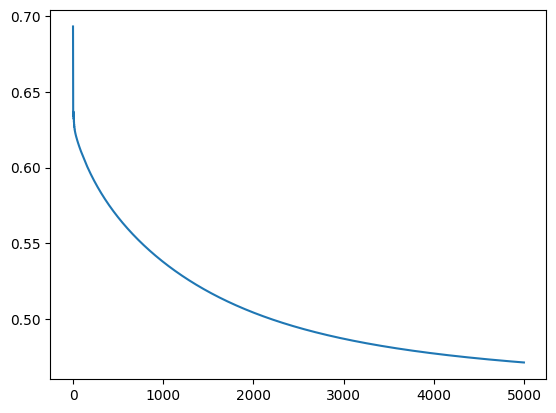

In [32]:
plt.plot(epoch_loss)

In [33]:
def accuracy(X_test, Y_test, theta):
    preds = hypothesis(X_test, theta)
    count = 0
    y_p = []
    for i in range(len(preds)):
        if preds[i] > 0.5:
            y_p.append(1)
        else:
            y_p.append(0)
    for i in range(len(preds)):
        if y_p[i] == Y_test[i]:
            count += 1
        else:
            pass
    return count/len(y_p)

In [34]:
acc = accuracy(train_X, train_Y, theta)

In [35]:
print(acc)

0.7968574635241302
